<a href="https://colab.research.google.com/github/JumanaKhrais/Transformer-Based-Deep-Learning-Models-for-Sarcasm-Detection-with-an-Imbalanced-Dataset./blob/main/Augmentation_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive') #this line to have the ability to read from and load to drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nlpaug


In [ ]:
!pip install nltk

In [ ]:
!pip install transformers

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import EarlyStoppingCallback
from transformers import AutoModelForSequenceClassification, AutoTokenizer 
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
import nlpaug
import nlpaug.augmenter.word as naw


In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [12]:
# Reading the dataset
pathT = "drive/MyDrive/TrainEnglish.csv"
train = pd.read_csv(pathT)

In [13]:
data = train[['tweet', 'sarcastic']].copy()

In [14]:
data["sarcastic"].value_counts()

0    2601
1     867
Name: sarcastic, dtype: int64

In [15]:
sarTweets = data[data['sarcastic']==1]


In [18]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=2)
phrases = sarTweets['tweet']
L = list()
for phrase in phrases:
  print("-"*100)
  print("Input_phrase: ", phrase)
  print("-"*100)
  para_phrasesT =  para_phrasesT = aug.augment(phrase,n=2)
  for para_phrase in para_phrasesT:
   print(para_phrase) 
   L.append(para_phrase)

----------------------------------------------------------------------------------------------------
Input_phrase:  The only thing I got from college is a caffeine addiction
----------------------------------------------------------------------------------------------------
The alone thing I got from college is a caffeine addiction
The only matter Iodin got from college is a caffeine addiction
----------------------------------------------------------------------------------------------------
Input_phrase:  I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯
----------------------------------------------------------------------------------------------------
I have intercourse it when professors draw a big question mark next to my answer on an exam because I ’ m always like yeah I don ’ t either ¯ \ _ (ツ) _ / ¯
I love it when professors draw a big question mark next to my answer on an exam because I ’ m al

In [19]:
nonsarTweets = data[data['sarcastic']==0]

In [20]:
nonsart = nonsarTweets['tweet']

In [21]:
tweets= list()

In [22]:
for x in L:
  tweets.append(x)

In [23]:
for x in nonsart:
  tweets.append(x)

In [24]:
len(tweets)

4335

In [26]:
import random
mylist = tweets
random.shuffle(mylist)



In [27]:
df = pd.DataFrame()  

In [28]:
df['tweet']=L

In [29]:
df['sarcastic']=1

In [30]:
df2= pd.DataFrame()

In [31]:
df2=nonsarTweets

In [32]:
AugDF = pd.concat([df, df2], ignore_index=True)

In [33]:
AugDF['sarcastic'].value_counts()

0    2601
1    1734
Name: sarcastic, dtype: int64

In [34]:
df = AugDF

In [35]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df.to_csv('drive/MyDrive/AugDF.csv', index=False)

In [36]:
pathT = "drive/MyDrive/AugDF.csv"
train = pd.read_csv(pathT)

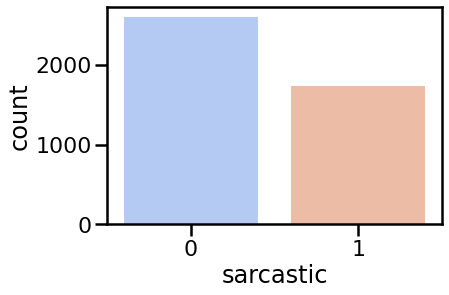

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
 
data = train
sns.set_context('poster', font_scale = 1)
sns.countplot(x ='sarcastic', data = data, palette ='coolwarm')